## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

## Boston house-prices

In [12]:
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()

boston_col = boston.data
boston_target = pd.Series(boston.target)

print(boston.data.shape)
boston_df = pd.DataFrame(boston_col, columns = boston['feature_names'])
boston_df = boston_df.merge(boston_target.to_frame('Price'), left_index = True, right_index = True)
boston_df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


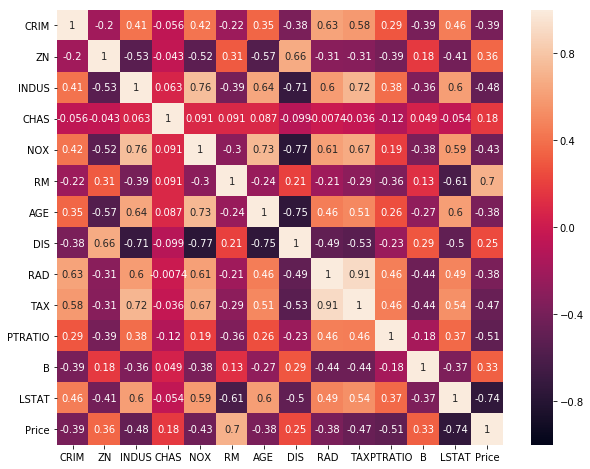

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

boston_corr = boston_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(boston_corr, vmin=-1, vmax=1, annot=True)
plt.show()

In [20]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
model = linear_model.LinearRegression()

X = boston_df[['LSTAT']]

x_train, x_test, y_train, y_test = train_test_split( X, boston.target, test_size = 0.3, random_state = 50)

print(x_train.shape)
print(y_train.shape)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

(354, 1)
(354,)


In [21]:
from sklearn.metrics import mean_squared_error as MSE
print("MSE: ",MSE(y_test, y_pred))

MSE:  46.23538609003997


(152, 1)
(152,)
(152,)


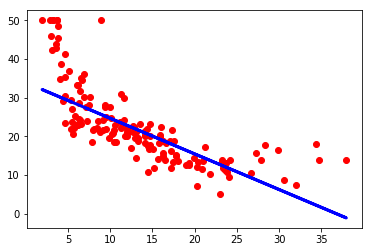

In [22]:

print(x_test.shape)
print(y_test.shape)
print(y_pred.shape)

plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

In [23]:
cross_val_score(model, x_train, y_train, cv=5).mean()

0.5370910172252163

In [24]:
model = linear_model.LinearRegression()

x_train, x_test, y_train, y_test = train_test_split( boston.data, boston.target, test_size = 0.3, random_state = 50)

print(x_train.shape)
print(y_train.shape)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

(354, 13)
(354,)


In [25]:
cross_val_score(model, x_train, y_train, cv=5).mean()

0.734843901596353

## Digits

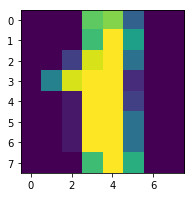

In [8]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd
digit = load_digits()

plt.figure(figsize = (3,3))
plt.imshow(digit.images[1])

In [9]:
digit_df = pd.DataFrame(digit.data)
digit_df = digit_df.merge(pd.Series(digit['target']).to_frame(), left_index=True, right_index=True)
digit_df.head()

,0_x,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,0_y
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [12]:
from sklearn.metrics import accuracy_score

model = linear_model.LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')

x_train, x_test, y_train, y_test = train_test_split( digit.data, digit.target, test_size = 0.3, random_state = 50)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [13]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ",acc)

Accuracy:  0.9592592592592593
